# **Project : Youtube Adview Prediction**

##**Internship Studio Machine Learning Internship**<br><br>

###***By Arnab Chakraborty***<br>
###***Email : chakrabortyarnab27@gmail.com***<br><br>

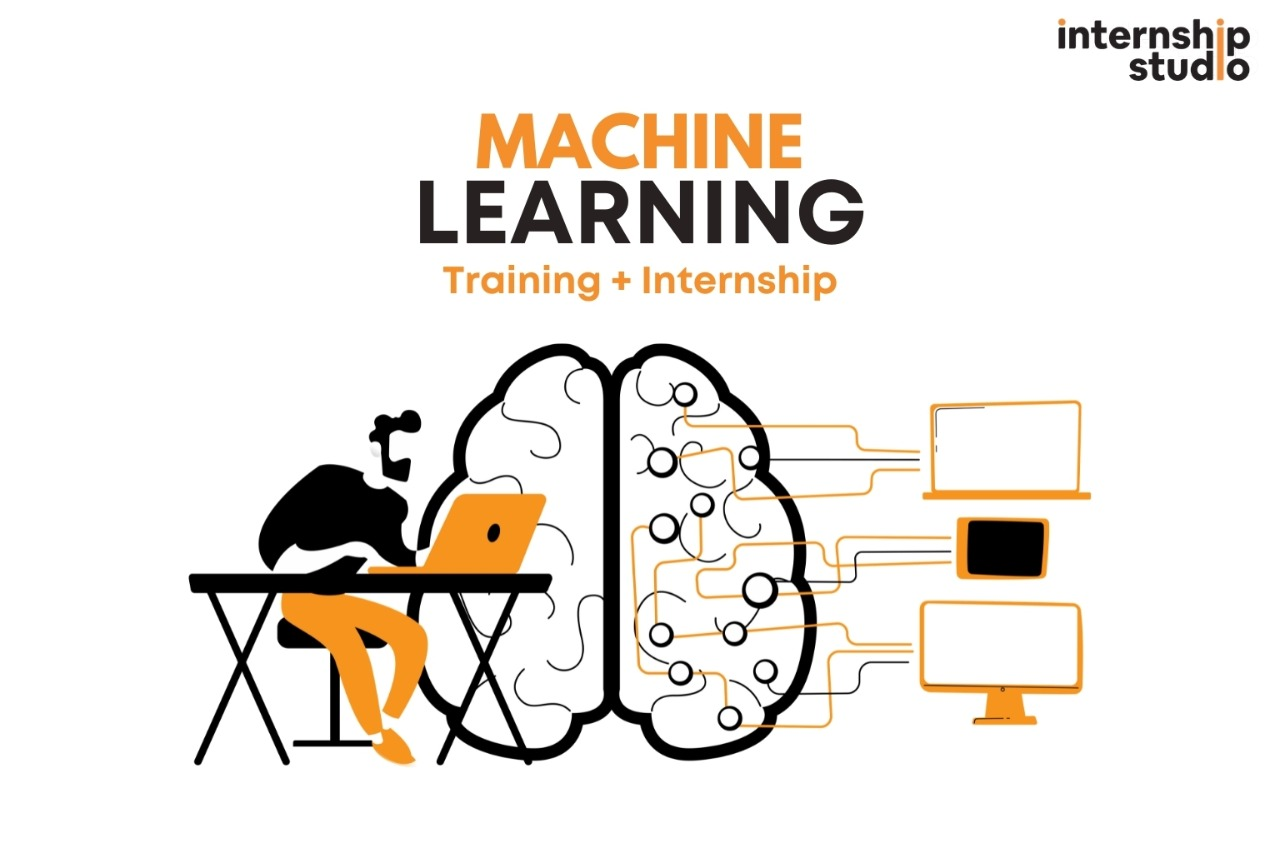

## **Data Description**

The file train.csv contains metrics and other details of about 15000 youtube
videos. The metrics include number of views, likes, dislikes, comments and
apart from that published date, duration and category are also included.
The train.csv file also contains the metric number of adviews which is our
target variable for prediction.

##**Data :**

Use the below link to download the Data Set:<br>
https://drive.google.com/file/d/1Dv-HF10AUUA03AO_cQvar462eXawk0iQ/view?usp=sharing

##**Context :**

Youtube advertisers pay content creators based on adviews and clicks for the
goods and services being marketed. They want to estimate the adview based
on other metrics like comments, likes etc. The problem statement is therefore
to train various regression models and choose the best one to predict the
number of adviews. The data needs to be refined and cleaned before feeding
in the algorithms for better results.

##**Attribute Information**

'vidid' : Unique Identification ID for each video<br>
'adview' : The number of adviews for each video<br>
'views' : The number of unique views for each video<br>
'likes' : The number of likes for each video<br>
'dislikes' : The number of likes for each video<br>
'comment' : The number of unique comments for each video<br>
'published' : The data of uploading the video<br>
'duration' : The duration of the video (in min. and seconds)<br>
'category' : Category niche of each of the video

##**Objective**
To build a machine learning regression to predict youtube adview count based
on other youtube metrics.

##**Steps and Tasks**
1. Import the datasets and libraries, check shape and datatype.
2. Visualise the dataset using plotting using heatmaps and plots. You
can study data distributions for each attribute as well.
3. Clean the dataset by removing missing values and other things.
4. Transform attributes into numerical values and other
necessary transformations
5. Normalise your data and split the data into training, validation and test
set in the appropriate ratio.
6. Use linear regression, Support Vector Regressor for training and get
errors.
7. Use Decision Tree Regressor and Random Forest Regressors.
8. Build an artificial neural network and train it with different layers
and hyperparameters. Experiment a little. Use keras.
9. Pick the best model based on error as well as
generalisation.
10.Save your model and predict on the test set.

- Download data: [Test.csv](https://internshipstudio.com/wp-content/uploads/2020/10/test.csv)
- After training your best model, save it, and then use it for the prediction of ‘adview’ for the test.csv data.
- Preprocess the test csv data similar to the way train csv data was preprocessed before using it for prediction.
- After predicting ‘adview’ save the column in a predictions.csv file.
- You have to keep all the code in one single ipynb file
- Use this form to submit your Project: [Project Submission form](https://forms.gle/k5SgToKwvEf4e3to6)

<br><br>
# **Training**

In [1]:
#Importing required packages and modules :

import datetime
import time
import numpy as np
import pandas as pd
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics
from sklearn import linear_model
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import keras
from keras.layers import Dense
import joblib
from keras.models import load_model

In [2]:
#Importing the trainig data from train.csv :
train_path = "/content/train.csv"
train_data = pd.read_csv(train_path)

In [3]:
#Viewing 1st 5 rows of the Dataset :
train_data.head()

,vidid,adview,views,likes,dislikes,comment,published,duration,category
0,VID_18655,40,1031602,8523,363,1095,2016-09-14,PT7M37S,F
1,VID_14135,2,1707,56,2,6,2016-10-01,PT9M30S,D
2,VID_2187,1,2023,25,0,2,2016-07-02,PT2M16S,C
3,VID_23096,6,620860,777,161,153,2016-07-27,PT4M22S,H
4,VID_10175,1,666,1,0,0,2016-06-29,PT31S,D


In [4]:
#Checking the shape of the Dataset :
train_data.shape

(14999, 9)

In [5]:
#Removing videos with adview greater than 2000000 as outliers :
train_data = train_data[train_data['adview'] < 2000000]

In [6]:
#Assigning each category to a number for 'category' feature :
category = {'A' : 1, 'B' : 2, 'C' : 3, 'D' : 4, 'E' : 5, 'F' : 6, 'G' : 7, 'H' : 8}
train_data['category'] = train_data['category'].map(category)

train_data.head()

,vidid,adview,views,likes,dislikes,comment,published,duration,category
0,VID_18655,40,1031602,8523,363,1095,2016-09-14,PT7M37S,6
1,VID_14135,2,1707,56,2,6,2016-10-01,PT9M30S,4
2,VID_2187,1,2023,25,0,2,2016-07-02,PT2M16S,3
3,VID_23096,6,620860,777,161,153,2016-07-27,PT4M22S,8
4,VID_10175,1,666,1,0,0,2016-06-29,PT31S,4


In [7]:
#Removing the character 'F' present in the data :
train_data = train_data[train_data.views != 'F']
train_data = train_data[train_data.likes != 'F']
train_data = train_data[train_data.dislikes != 'F']
train_data = train_data[train_data.comment != 'F']

train_data.shape

(14636, 9)

In [8]:
#Converting values to integers for views, likes, comments, dislkes and adview :
train_data['views'] = pd.to_numeric(train_data['views'])
train_data['likes'] = pd.to_numeric(train_data['likes'])
train_data['dislikes'] = pd.to_numeric(train_data['dislikes'])
train_data['comment'] = pd.to_numeric(train_data['comment'])
train_data['adview'] = pd.to_numeric(train_data['adview'])

#Extracting the 'vidid' column from train_data and storing in vidid_column :
vidid_column = train_data['vidid']
vidid_column

0        VID_18655
1        VID_14135
2         VID_2187
3        VID_23096
4        VID_10175
           ...    
14994       VID_31
14995     VID_5861
14996      VID_805
14997    VID_19843
14998     VID_8534
Name: vidid, Length: 14636, dtype: object

In [9]:
#Encoding features like 'published', 'duration' and 'vidid' :
train_data['duration'] = LabelEncoder().fit_transform(train_data['duration'])
train_data['published'] = LabelEncoder().fit_transform(train_data['published'])
train_data['vidid'] = LabelEncoder().fit_transform(train_data['vidid'])
train_data.head()

,vidid,adview,views,likes,dislikes,comment,published,duration,category
0,5912,40,1031602,8523,363,1095,2168,2925,6
1,2741,2,1707,56,2,6,2185,3040,4
2,8138,1,2023,25,0,2,2094,1863,3
3,9004,6,620860,777,161,153,2119,2546,8
4,122,1,666,1,0,0,2091,1963,4


In [10]:
#Defining a function to convert time to seconds under 'duration' column :

def checki(x):
  y = x[2:]
  h = ''
  m = ''
  s = ''
  mm = ''
  P = ['H', 'M', 'S']
  for i in y:
    if i not in P:
      mm += i
    else:
      if i == 'H':
        h = mm
        mm = ''
      elif i == 'M':
        m = mm
        mm = ''
      else:
        s = mm
        mm = ''
  
  if h == '':
    h = '00'
  if m == '':
    m = '00'
  if s == '':
    s = '00'
  bp = h + ':' + m + ':' + s 
  return bp


train = pd.read_csv('train.csv')
mp = pd.read_csv(train_path)['duration']
time = mp.apply(checki)

def func_sec(time_string):
  h, m, s = time_string.split(':')
  return (int)(h) * 3600 + (int)(m) * 60 + (int)(s)

time1 = time.apply(func_sec)

train_data['duration'] = time1
train_data.head()

,vidid,adview,views,likes,dislikes,comment,published,duration,category
0,5912,40,1031602,8523,363,1095,2168,457,6
1,2741,2,1707,56,2,6,2185,570,4
2,8138,1,2023,25,0,2,2094,136,3
3,9004,6,620860,777,161,153,2119,262,8
4,122,1,666,1,0,0,2091,31,4


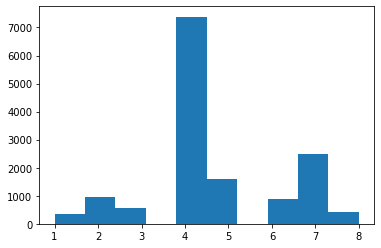

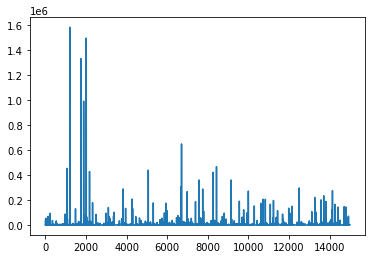

In [11]:
#Visualization of Individual Plots :
plt.hist(train_data['category'])
plt.show()
plt.plot(train_data['adview'])
plt.show()

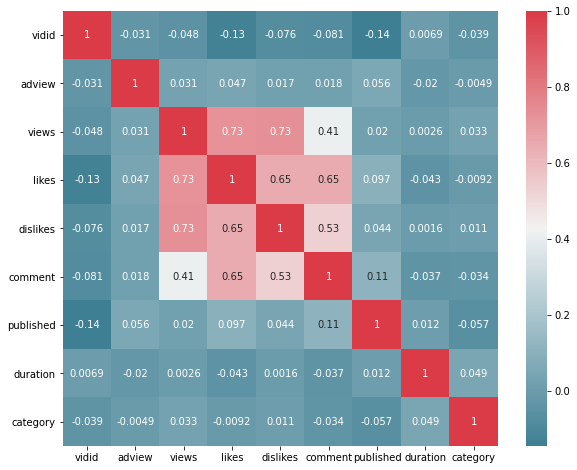

In [12]:
#Visualizing in HeatMap:

f, ax = plt.subplots(figsize = (10,8))
corr = train_data.corr()
sns.heatmap(corr, mask = np.zeros_like(corr, dtype = np.bool), cmap = sns.diverging_palette(220, 10, as_cmap = True), square = True, ax = ax, annot = True)
plt.show()

In [13]:
#Splitting Data :
Y_train = pd.DataFrame(data = train_data.iloc[:,1].values, columns = ['target'])
train_data = train_data.drop(['adview'], axis = 1)
train_data = train_data.drop(['vidid'], axis = 1)
train_data.head()

,views,likes,dislikes,comment,published,duration,category
0,1031602,8523,363,1095,2168,457,6
1,1707,56,2,6,2185,570,4
2,2023,25,0,2,2094,136,3
3,620860,777,161,153,2119,262,8
4,666,1,0,0,2091,31,4


In [14]:
X_train, X_test, Y_train, Y_test = train_test_split(train_data, Y_train, test_size = 0.2, random_state = 42) 

print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(11708, 7)
(2928, 7)
(11708, 1)
(2928, 1)


In [15]:
#Normalising Data :
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

print(X_train.mean())
print(X_test.mean())

0.1739096800320488
0.17614792076344343


In [16]:
#Evaluation Metrics :
def print_error(X_test, Y_test, model_name):
  prediction = model_name.predict(X_test)
  print('Mean Absolute Error : ', metrics.mean_absolute_error(Y_test, prediction))
  print('Mean Squared Error : ', metrics.mean_squared_error(Y_test, prediction))
  print('Root Mean Squared Error : ', np.sqrt(metrics.mean_squared_error(Y_test, prediction)))

In [17]:
#Linear Regressor :
linear_regression = linear_model.LinearRegression()
linear_regression.fit(X_train, Y_train)
print_error(X_test, Y_test, linear_regression)

Mean Absolute Error :  3707.378005824532
Mean Squared Error :  835663131.1210337
Root Mean Squared Error :  28907.83857573986


In [18]:
#Support Vector Regressor(SVR) :
supportvector_regressor = SVR()
supportvector_regressor.fit(X_train, Y_train)
print_error(X_test, Y_test, supportvector_regressor)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Mean Absolute Error :  1696.9438599505638
Mean Squared Error :  833685776.029172
Root Mean Squared Error :  28873.617300732723


In [19]:
#Decision Tree Regressor :
decision_tree = DecisionTreeRegressor()
decision_tree.fit(X_train, Y_train)
print_error(X_test, Y_test, decision_tree)

Mean Absolute Error :  2673.9532103825136
Mean Squared Error :  886375758.0454235
Root Mean Squared Error :  29772.063382396314


In [20]:
#Random Forest Regressor :
n_estimators = 200
max_depth = 25
min_samples_split = 15
min_samples_leaf = 2
random_forest = RandomForestRegressor(n_estimators = n_estimators, max_depth = max_depth, min_samples_split = min_samples_split, min_samples_leaf = min_samples_leaf)
random_forest.fit(X_train, Y_train)
print_error(X_test, Y_test, random_forest)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys


Mean Absolute Error :  3438.7725209945716
Mean Squared Error :  709436467.665543
Root Mean Squared Error :  26635.248594025605


In [21]:
#Creating Artificial Neural Network :
ann = keras.models.Sequential([Dense(6, activation = 'relu', input_shape = X_train.shape[1:]), Dense(6, activation = 'relu'), Dense(1)])
optimizer = keras.optimizers.Adam()
loss = keras.losses.mean_squared_error
ann.compile(optimizer = optimizer, loss = loss, metrics = ['mean_squared_error'])
history = ann.fit(X_train, Y_train, epochs = 100)
ann.summary()
print_error(X_test, Y_test, ann)

Epoch 1/100
366/366 [==============================] - 14s 854us/step - loss: 607871836.7035 - mean_squared_error: 607871836.7035
Epoch 2/100
366/366 [==============================] - 0s 898us/step - loss: 506044945.4278 - mean_squared_error: 506044945.4278
Epoch 3/100
366/366 [==============================] - 0s 856us/step - loss: 357105645.4470 - mean_squared_error: 357105645.4470
Epoch 4/100
366/366 [==============================] - 0s 906us/step - loss: 858335295.4550 - mean_squared_error: 858335295.4550
Epoch 5/100
366/366 [==============================] - 0s 921us/step - loss: 564170878.1802 - mean_squared_error: 564170878.1802
Epoch 6/100
366/366 [==============================] - 0s 875us/step - loss: 501669519.4768 - mean_squared_error: 501669519.4768
Epoch 7/100
366/366 [==============================] - 0s 901us/step - loss: 342780829.2589 - mean_squared_error: 342780829.2589
Epoch 8/100
366/366 [==============================] - 0s 928us/step - loss: 1198492008.6921 - m

In [22]:
#Saving Scikitlearn models :
joblib.dump(supportvector_regressor, 'SVR_youtubeadview.pkl')

#Saving Keras Artificial Neural Network Model :
ann.save('ann_youtubeadview.h5')

<br><br>
# **Testing**

In [23]:
test_path = '/content/test.csv'
test_data = pd.read_csv(test_path)

In [24]:
test_data.head()

,vidid,views,likes,dislikes,comment,published,duration,category
0,VID_1054,440238,6153,218,1377,2017-02-18,PT7M29S,B
1,VID_18629,1040132,8171,340,1047,2016-06-28,PT6M29S,F
2,VID_13967,28534,31,11,1,2014-03-10,PT37M54S,D
3,VID_19442,1316715,2284,250,274,2010-06-05,PT9M55S,G
4,VID_770,1893173,2519,225,116,2016-09-03,PT3M8S,B


In [25]:
test_data.shape

(8764, 8)

In [26]:
#Removing character 'F' present in the data :
test_data = test_data[test_data.views != 'F']
test_data = test_data[test_data.likes != 'F']
test_data = test_data[test_data.dislikes != 'F']
test_data = test_data[test_data.comment != 'F']

test_data.shape

(8549, 8)

In [27]:
#Assigning each category to a number for 'category' feature :
category = {'A' : 1, 'B' : 2, 'C' : 3, 'D' : 4, 'E' : 5, 'F' : 6, 'G' : 7, 'H' : 8}
test_data['category'] = test_data['category'].map(category)

test_data.head()

,vidid,views,likes,dislikes,comment,published,duration,category
0,VID_1054,440238,6153,218,1377,2017-02-18,PT7M29S,2
1,VID_18629,1040132,8171,340,1047,2016-06-28,PT6M29S,6
2,VID_13967,28534,31,11,1,2014-03-10,PT37M54S,4
3,VID_19442,1316715,2284,250,274,2010-06-05,PT9M55S,7
4,VID_770,1893173,2519,225,116,2016-09-03,PT3M8S,2


In [29]:
#Converting values to integers for views, likes, comments, dislkes and adview :
test_data['views'] = pd.to_numeric(test_data['views'])
test_data['likes'] = pd.to_numeric(test_data['likes'])
test_data['dislikes'] = pd.to_numeric(test_data['dislikes'])
test_data['comment'] = pd.to_numeric(test_data['comment'])

#Extracting the 'vidid' column from test_data and storing in vidid_column :
vidid_column = test_data['vidid']
vidid_column

0        VID_1054
1       VID_18629
2       VID_13967
3       VID_19442
4         VID_770
          ...    
8759     VID_2944
8760     VID_8195
8761    VID_18973
8762     VID_5849
8763     VID_8494
Name: vidid, Length: 8549, dtype: object

In [30]:
#Encoding features like 'duration', 'vidid' and 'published' :
test_data['duration'] = LabelEncoder().fit_transform(test_data['duration'])
test_data['vidid'] = LabelEncoder().fit_transform(test_data['vidid'])
test_data['published'] = LabelEncoder().fit_transform(test_data['published'])

test_data.head()

,vidid,views,likes,dislikes,comment,published,duration,category
0,231,440238,6153,218,1377,2053,2115,2
1,3444,1040132,8171,340,1047,1825,2055,6
2,1593,28534,31,11,1,1009,1506,4
3,3775,1316715,2284,250,274,116,2265,7
4,7644,1893173,2519,225,116,1892,1625,2


In [31]:
#Converting time to seconds under 'duration' column :

test = pd.read_csv('test.csv')
mp = pd.read_csv(test_path)['duration']
time = mp.apply(checki)

time1 = time.apply(func_sec)

test_data['duration'] = time1
test_data.head()

,vidid,views,likes,dislikes,comment,published,duration,category
0,231,440238,6153,218,1377,2053,449,2
1,3444,1040132,8171,340,1047,1825,389,6
2,1593,28534,31,11,1,1009,2274,4
3,3775,1316715,2284,250,274,116,595,7
4,7644,1893173,2519,225,116,1892,188,2


In [32]:
test_data = test_data.drop(['vidid'], axis = 1)
test_data.head()

,views,likes,dislikes,comment,published,duration,category
0,440238,6153,218,1377,2053,449,2
1,1040132,8171,340,1047,1825,389,6
2,28534,31,11,1,1009,2274,4
3,1316715,2284,250,274,116,595,7
4,1893173,2519,225,116,1892,188,2


In [33]:
#Normalising Data :
scaler = MinMaxScaler()
X_test = test_data
X_test = scaler.fit_transform(X_test)

In [39]:
#Model selection : Support Vector Regressor Model since this model gave the least Mean Absolute Error
model = supportvector_regressor

In [40]:
#Performing Prediction on test data :
prediction = model.predict(X_test)

In [41]:
#Converting the prediction into a Dataframe : 
prediction = pd.DataFrame(prediction)
prediction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8549 entries, 0 to 8548
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       8549 non-null   float64
dtypes: float64(1)
memory usage: 66.9 KB


In [42]:
#Renaming the column to 'adview' :
prediction = prediction.rename(columns = {0 : 'adview'})
prediction.head()

,adview
0,2.655214
1,2.402158
2,2.059470
3,2.284217
4,2.284820


In [43]:
#Saving the prediction Dataframe in a new .csv FIle -> 'prediction.csv' :
prediction.to_csv('PredictedAdview.csv')